In [1]:
#IMPORTS 
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append(r"C:\Users\EmilR\Documents\GitHub\MoleculeSim\ownSim")

import forces as fc
import molecules as mc
import random
import copy

In [2]:
samples = 100
# function to yield energies and step acceptance for different distances between 2 molecules
def test_step_acceptance(mol1,mol2, universe):
  e_current = mc.get_energy(mol1, universe)
  inter = mc.inter_dist(mol1,mol2)
  print(inter)
  dists = np.linspace(0.1,inter, samples) # evenly spaced distances between
  delta_moves = [(mol2.pos - mol1.pos) - np.array([0.,0.,mol2.radius]) - np.array([0.,0.,mol1.radius]) - np.array([0.,0.,dist]) for dist in dists][::-1]
  energies = []
  accepts = []
  for move in delta_moves:  
      mol_copy = copy.deepcopy(mol1)
      #print(type(move[0]))
      #print(type(mol1.pos[0]))
      mol_copy.move(move)

      #calculate energy for potential new location
      e_new = mc.get_energy(mol1, universe, mol_copy)

      # if move is accepted, make the real molecule perform the step
      accepted = fc.accept_move(e_current,e_new, mc.BETA)

      energies.append(e_new)
      accepts.append(accepted)
  
  return e_current, energies, accepts

In [3]:
#define universe
box_const_size = 500
box_size = np.array([box_const_size,box_const_size,box_const_size]) #max coordinate values for universe
num_molecules = 2
seed = 1313

# create 2 mole universe
mol1, mol2 = mc.Molecule(np.array([100.,100.,100.]), 100.), mc.Molecule(np.array([100.,100.,325.]), 100.)
uni = mc.SimpleUniverse(box_size, num_molecules,[],seed,own_molecules=[mol1,mol2])

# get metrics
e_current, energy, accepts = test_step_acceptance(mol1,mol2, uni)

25.0


ValueError: <molecules.Molecule object at 0x000001CE3879AE00> is not in list

In [ ]:
# m1 = np.array([100.,100.,100.])
# m2 = np.array([100.,100.,325.])
# dif = m2-m1
# norm = np.sqrt(np.sum(dif**2))
# print(norm)
# print(dif)
# print(np.linalg.norm(m2-m1))

In [ ]:
### THIS FUCNTION SHOULD NOT GIVE A WARNING
import warnings

def get_acc(ePrev,eNew,Beta):
  prob = np.exp(-Beta*(eNew- ePrev))
  #print("prob: ", prob)
  # print("B", Beta)
  # print("prev", ePrev)
  # print("new",eNew)
  #return min(1,prob)
  return prob
    

In [ ]:
print(uni.molecules[0].pos)
print(uni.molecules[1].pos)

[100. 100. 100.]
[100. 100. 325.]


In [ ]:
# forces = fc.total_force_molecule(mol1,mol2)
# ep = mc.get_energy(mol1, uni)
# print(forces)
# print(ep)
# mol1.move(np.array([0,0,23]))

# forces = fc.total_force_molecule(mol1,mol2)
# ep = mc.get_energy(mol1, uni)
# print(forces)
# print(ep)






25.0
[ 0.1         0.35151515  0.6030303   0.85454545  1.10606061  1.35757576
  1.60909091  1.86060606  2.11212121  2.36363636  2.61515152  2.86666667
  3.11818182  3.36969697  3.62121212  3.87272727  4.12424242  4.37575758
  4.62727273  4.87878788  5.13030303  5.38181818  5.63333333  5.88484848
  6.13636364  6.38787879  6.63939394  6.89090909  7.14242424  7.39393939
  7.64545455  7.8969697   8.14848485  8.4         8.65151515  8.9030303
  9.15454545  9.40606061  9.65757576  9.90909091 10.16060606 10.41212121
 10.66363636 10.91515152 11.16666667 11.41818182 11.66969697 11.92121212
 12.17272727 12.42424242 12.67575758 12.92727273 13.17878788 13.43030303
 13.68181818 13.93333333 14.18484848 14.43636364 14.68787879 14.93939394
 15.19090909 15.44242424 15.69393939 15.94545455 16.1969697  16.44848485
 16.7        16.95151515 17.2030303  17.45454545 17.70606061 17.95757576
 18.20909091 18.46060606 18.71212121 18.96363636 19.21515152 19.46666667
 19.71818182 19.96969697 20.22121212 20.4727272

C:\Users\EmilR\AppData\Local\Temp\ipykernel_34504\3307302905.py:5: RuntimeWarning: overflow encountered in exp
  prob = np.exp(-Beta*(eNew- ePrev))


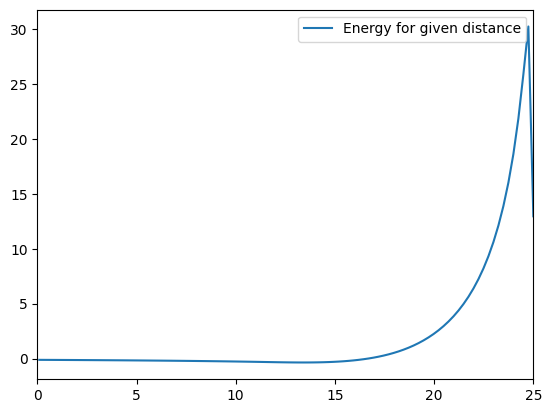

In [ ]:
#Plot relationship between interdistance and energy
inter = mc.inter_dist(mol1,mol2)
print(inter)
dists = np.linspace(0.1,inter, samples)
print(dists)
acc_rate = [get_acc(e_current,e, mc.BETA) for e in energy]
print(acc_rate)
plt.figure()
#plt.plot(dists,acc_rate, label = "acceptance probability for given distance")
plt.plot(dists, energy, label = "Energy for given distance")
plt.xlim([0,25])
plt.legend()
plt.show()


In [ ]:
forces = fc.total_force_molecule(mol1,mol2)
# ep = mc.get_energy(mol1, uni)
# print(forces)
# print(ep)
# mol1.move(np.array([0,0,23]))

# forces = fc.total_force_molecule(mol1,mol2)
# ep = mc.get_energy(mol1, uni)
# print(forces)
# print(ep)


In [ ]:
print(uni.molecules[0].pos)
print(uni.molecules[1].pos)
print(mol1.pos)
print(mol2.pos)

[100. 100. 100.]
[100. 100. 325.]
[100. 100. 100.]
[100. 100. 325.]


In [ ]:
def pls_work(mol_fixed, mol_moved, universe): #compute the energy of all molecules with respect to
  idx = universe.molecules.index(mol_fixed)
  nbs = [m for m in universe.molecules]
  del nbs[idx]
  energy = sum([fc.total_force_molecule(mol_moved,m2) for m2 in nbs])
  return energy

In [ ]:
m1_copy = copy.deepcopy(mol1)

# x = pls_work(mol1,m1_copy, uni)
# print(x)

m1_copy.move(np.array([0.,0.,23.]))
x = pls_work(mol1,m1_copy, uni)
print(x)

11.25565253970488
